# JuliaでKeplerの法則のシミュレーション

具体的な数値計算は https://drive.google.com/file/d/1BJzy3BMRnBzB0bVKxcA0ucTAcTFmnn0r/view?usp=sharing で紹介したEuler法，Feynmanが自著で紹介した方法（Leap-frog法）と，Runge-Kutta法で行う．また，3法則が近似的に成り立つことも示す．

In [94]:
# パッケージをインポート
using Pkg
Pkg.add("Plots")
using Plots
using LinearAlgebra

   Resolving package versions...
  No Changes to `C:\Users\nnaot\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\nnaot\.julia\environments\v1.10\Manifest.toml`


## Euler法

初期条件を与えたらEuler法で計算してくれる関数を定義する．これは1次近似
$$\begin{aligned}
v(t+\Delta t)&=v(t)+a(t)\Delta t \\
r(t+\Delta t)&=r(t)+v(t)\Delta t
\end{aligned}$$
なので簡単である．

In [95]:
function Euler(r, v, Δt, i)              # 初期位置ベクトルr, 初速度ベクトルv, 時間幅Δt, 繰り返しi
    x = [r[1]]                           # x座標のリストに初期条件だけ入れておく
    y = [r[2]]                           # y座標のリストに初期条件だけ入れておく

    for _ in 1:i
        a = -r / norm(r) ^ 3             # 運動方程式（GM = 1とした），norm(r)はrの原点からの距離
        v += a * Δt                      # 速度を一次近似，v(t+Δt) = v(t) + a(t) Δt
        r += v * Δt                      # 位置を一次近似，r(t+Δt) = r(t) + v(t) Δt

        push!(x, r[1])                   # x座標をリストに追加
        push!(y, r[2])                   # y座標をリストに追加
    end
    
    #プロットする．
    plot = scatter(x, y, 
    xlabel = "x", ylabel = "y",
    size = [750, 500], label = "Orbit",
    xlims = [-1.5, 1], ylims = [-1, 1],)
   
    scatter!(plot, [0], [0],
    marker = 10, label = "Focus")
    
    return plot
end

Euler (generic function with 1 method)

初期条件を設定する．値は https://www.feynmanlectures.caltech.edu/I_09.html の9-7を参照した．

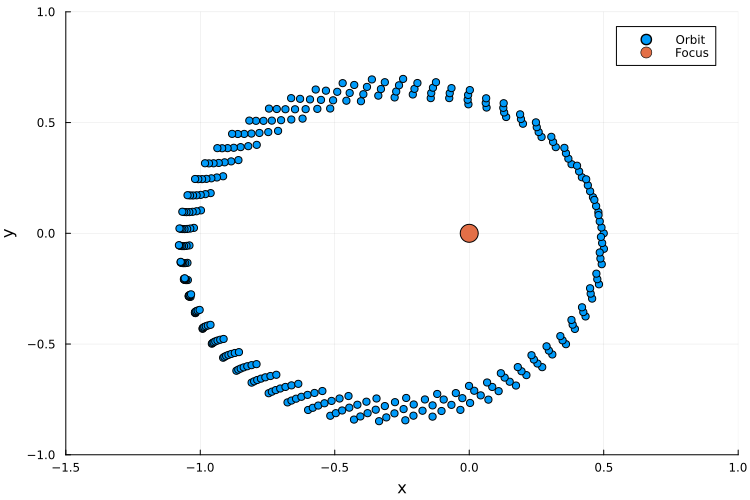

In [96]:
Euler([0.5, 0], [0, 1.63], 0.1, 300) # 初期位置(0.5, 0), 初速度(0, 1.63), 時間幅0.1, 繰り返し300

だいたい楕円軌道だが，はっきり誤差が見える．

## Feynmanの方法(Leap-frog法)

https://www.feynmanlectures.caltech.edu/I_09.html の9-5で，ファインマンは(9.16)式
$$\begin{aligned}
v(t+\Delta t /2) &= v(t-\Delta t /2) + a(t) \Delta t, \\
r(t+\Delta t)&=r(t)+v(t+\Delta t/2)
\end{aligned}$$
のような計算を考えた．
この方法はLeap-frog法と呼ばれ，2次近似である．

In [97]:
function Feynman(r, v, Δt, i)
    x = [r[1]]
    y = [r[2]]
    h = [cross(r, v)]            # 後々のため角運動量に相当する量hを計算しておく
    a = -r / norm(r) ^ 3         # 初期の加速度a(0)を計算
    v += a * Δt / 2              # v(Δt/2)を計算

    for _ in 1:i
        r += v * Δt              # 位置をフルステップ更新，r(t+Δt) = r(t) + v(t+Δt/2) Δt
        a = -r / norm(r) ^ 3     # 新しい加速度を計算
        v += a * Δt              # 速度をフルステップ更新，v(t+Δt/2) = v(t-Δt/2) + a(t) Δt

        push!(x, r[1])
        push!(y, r[2])
        push!(h, cross(r, v))
    end

    #プロットする．
    plot = scatter(x, y, 
    xlabel = "x", ylabel = "y",
    size = (750, 500), label = "Orbit",
    xlims = (-1.5, 1), ylims = (-1, 1))
   
    scatter!(plot, [0], [0],
    markersize = 10, label = "Focus")
    
    return plot, x, y, h
end

plot_F, x_F, y_F, h_F = Feynman([0.5, 0, 0], [0, 1.63, 0], 0.1, 300)

(Plot{Plots.GRBackend() n=2}, [0.5, 0.48, 0.42315147267440123, 0.33732965521866287, 0.23192655418209163, 0.11540551075419593, -0.005652390521778031, -0.1265270848685085, -0.2439793128433602, -0.3558394291873819  …  0.5119457663861604, 0.4964995436580464, 0.44945750772368215, 0.37853330074881414, 0.291086006511758, 0.1932044500363037, 0.08958340434789722, -0.01627407162053275, -0.12178464553527286, -0.22504220510966155], [0.0, 0.163, 0.3134868542623488, 0.44250918301301, 0.5458447757603285, 0.6230140211788109, 0.6756911428418848, 0.7064675662216175, 0.7181345515649862, 0.7133415816297457  …  0.05382569100635515, 0.21139823420299741, 0.3555179974216398, 0.4807471169720919, 0.5849914868345731, 0.6682662654274177, 0.7316889804623069, 0.7768452386308041, 0.8054420754716851, 0.8191382445117592], [[0.0, 0.0, 0.815], [0.0, -0.0, 0.815], [0.0, -0.0, 0.815], [0.0, -0.0, 0.815], [0.0, -0.0, 0.815], [0.0, -0.0, 0.815], [0.0, 0.0, 0.8150000000000001], [0.0, 0.0, 0.8150000000000001], [0.0, 0.0, 0.81

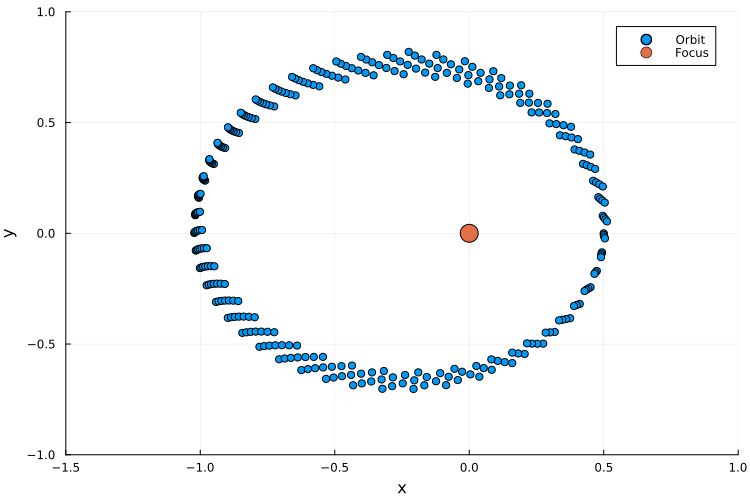

In [98]:
plot_F # Feynman([0.5, 0, 0], [0, 1.63, 0], 0.1, 300) をプロット

あまり精度が上がった感じがしない......

## Runge-Kutta法

4次のRunge-Kutta法で精度を上げてみる．新たな関数を定義する．
詳細な式は https://drive.google.com/file/d/1BJzy3BMRnBzB0bVKxcA0ucTAcTFmnn0r/view?usp=sharing を参照．

In [99]:
function Runge_Kutta(r, v, Δt, i)
    x = [r[1]]
    y = [r[2]]
    h = [cross(r, v)]

    for _ in 1:i
        a(r) = -r / norm(r) ^ 3
        
        r_p = r
        v_p = v
        k_r1 = v_p
        k_v1 = a(r_p)               # k_1を定義
        
        r_p = r + 0.5 * k_r1 * Δt
        v_p = v + 0.5 * k_v1 * Δt
        k_r2 = v_p
        k_v2 = a(r_p)               # k_2を定義
        
        r_p = r + 0.5 * k_r2 * Δt
        v_p = v + 0.5 * k_v2 * Δt
        k_r3 = v_p
        k_v3 = a(r_p)               # k_3を定義
        
        r_p = r + k_r3 * Δt
        v_p = v + k_v3 * Δt
        k_r4 = v_p
        k_v4 = a(r_p)               # k_4を定義
        
        r += (k_r1 + 2.0 * k_r2 + 2.0 * k_r3 + k_r4) * Δt / 6.0
        v += (k_v1 + 2.0 * k_v2 + 2.0 * k_v3 + k_v4) * Δt / 6.0

        push!(x, r[1])
        push!(y, r[2])
        push!(h, cross(r, v))
    end

    plot = scatter(x, y, 
    xlabel = "x", ylabel = "y",
    size = (750, 500), label = "Orbit",
    xlims = [-1.5, 1], ylims = [-1, 1],)
   
    scatter!(plot, [0], [0],
    marker = 10, label = "Focus")
    
    return plot, x, y, h
end

plot_R, x_R, y_R, h_R = Runge_Kutta([0.5, 0, 0], [0, 1.63, 0], 0.1, 300)
plot_R0, x_R0, y_R0, h_R0 = Runge_Kutta([0.5, 0, 0], [0, 1.63, 0], 0.001, 30000)


(Plot{Plots.GRBackend() n=2}, [0.5, 0.4999980000026471, 0.4999920000423538, 0.4999820002144142, 0.4999680006776461, 0.49995000165438197, 0.4999280034304569, 0.49990200635519255, 0.4998720108413779, 0.4998380173652465  …  -0.9479879427070863, -0.9482772420099455, -0.9485655203633951, -0.9488527777543297, -0.949139014169755, -0.9494242295967871, -0.9497084240226522, -0.9499915974346859, -0.9502737498203316, -0.950554881167141], [0.0, 0.0016299978266688083, 0.0032599826134407893, 0.004889941320831799, 0.006519860910183024, 0.008149728344073558, 0.009779530586732865, 0.011409254604453113, 0.013038887366001306, 0.014668415843031227  …  0.23042983332258135, 0.2296404386162938, 0.22885079667079977, 0.22806090840797455, 0.22727077474918284, 0.22648039661528074, 0.22568977492661776, 0.22489891060303882, 0.22410780456388618, 0.22331645772800154], [[0.0, 0.0, 0.815], [0.0, -0.0, 0.8149999999999998], [0.0, -0.0, 0.8149999999999997], [0.0, -0.0, 0.8149999999999998], [0.0, -0.0, 0.8149999999999998],

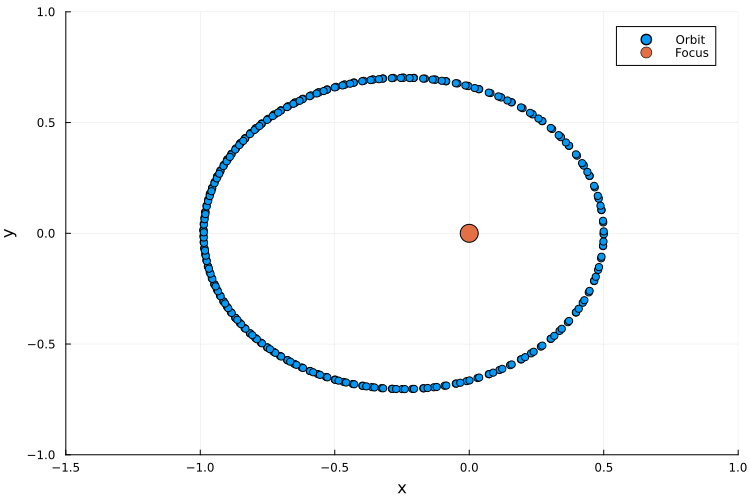

In [100]:
plot_R # Runge_Kutta([0.5, 0, 0], [0, 1.63, 0], 0.1, 300) をプロット

かなり精度が上がった！

## 3法則の確認

Keplerの3法則
- 楕円軌道の法則
- 面積速度一定の法則
- 調和の法則

が成り立っているか調べる．Feynmanの方法と，最も精度が高かったRunge-Kutta法で考える．

### 楕円軌道の法則

これは成立しているとしてよいだろう．後々のため，長半径と短半径を計算する．

In [101]:
L_F = (maximum(x_F) - minimum(x_F)) / 2 #長半径Lを計算
l_F = (maximum(y_F) - minimum(y_F)) / 2 #短半径lを計算
L_R = (maximum(x_R) - minimum(x_R)) / 2
l_R = (maximum(y_R) - minimum(y_R)) / 2

0.7032614044625268

### 面積速度一定の法則

面積速度に相当する量である位置ベクトルと速度ベクトルの外積
$$
h = r \times v
$$
を各プロットに対して求め，そのz成分を記録する．

まずはFeynmanの方法について．

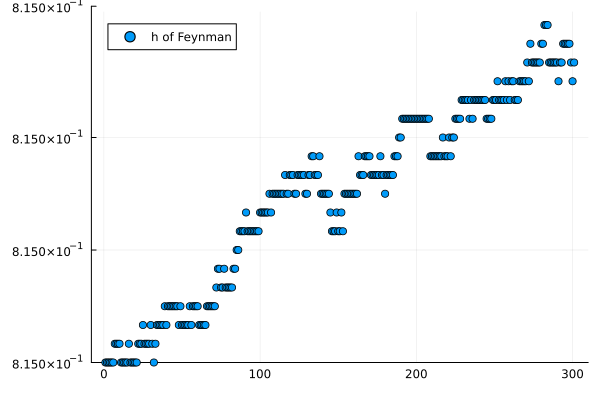

In [102]:
scatter(map(v -> v[3], h_F), label = "h of Feynman") # h_Fのz成分をプロット

値の変化が乏しすぎて警告が出ているので初期値からのズレをプロットする．

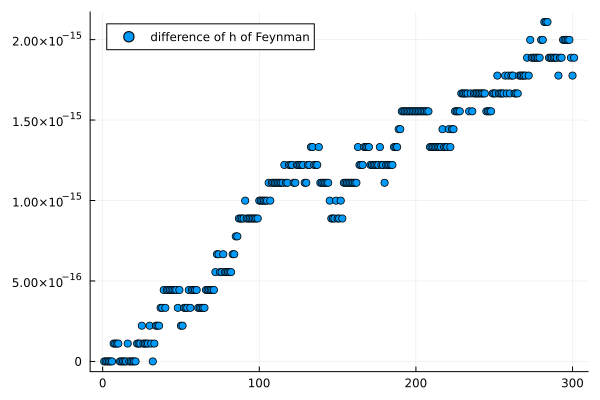

In [103]:
h_F1= [h_F[1] for _ in 0:300] #h_Fの初期値で満たされたリストを作成
scatter(map(v -> v[3], h_F - h_F1), label = "difference of h of Feynman")

300回のプロットでも誤差は10^-15オーダーしか生じないことがわかった．

h_Fの差分を最初の60回について求める．

In [104]:
for i in 1:60
    println(h_F[i+1]-h_F[i],",i=",i)
end

[0.0, -0.0, 0.0],i=1
[0.0, 0.0, 0.0],i=2
[0.0, 0.0, 0.0],i=3
[0.0, 0.0, 0.0],i=4
[0.0, 0.0, 0.0],i=5
[0.0, 0.0, 1.1102230246251565e-16],i=6
[0.0, 0.0, 0.0],i=7
[0.0, 0.0, 0.0],i=8
[0.0, 0.0, 0.0],i=9
[0.0, 0.0, -1.1102230246251565e-16],i=10
[0.0, 0.0, 0.0],i=11
[0.0, 0.0, 0.0],i=12
[0.0, 0.0, 0.0],i=13
[0.0, 0.0, 0.0],i=14
[0.0, 0.0, 1.1102230246251565e-16],i=15
[0.0, 0.0, -1.1102230246251565e-16],i=16
[0.0, 0.0, 0.0],i=17
[0.0, 0.0, 0.0],i=18
[0.0, 0.0, 0.0],i=19
[0.0, 0.0, 0.0],i=20
[0.0, 0.0, 1.1102230246251565e-16],i=21
[0.0, 0.0, 0.0],i=22
[0.0, 0.0, 0.0],i=23
[0.0, 0.0, 1.1102230246251565e-16],i=24
[0.0, 0.0, -1.1102230246251565e-16],i=25
[0.0, 0.0, 0.0],i=26
[0.0, 0.0, 0.0],i=27
[0.0, 0.0, 0.0],i=28
[0.0, 0.0, 1.1102230246251565e-16],i=29
[0.0, 0.0, -1.1102230246251565e-16],i=30
[0.0, 0.0, -1.1102230246251565e-16],i=31
[0.0, 0.0, 1.1102230246251565e-16],i=32
[0.0, 0.0, 1.1102230246251565e-16],i=33
[-0.0, 0.0, 0.0],i=34
[0.0, 0.0, 0.0],i=35
[0.0, 0.0, 1.1102230246251565e-16],i=36

節々で登場する値1.1102230246251565e-16は計算機イプシロンというもので，浮動小数点演算の丸めによって発生する相対誤差の上限である．要するに，Feynmanの方法ではhの差分は計算不可能なほど小さい．

次にRunge-Kutta法について調べる．

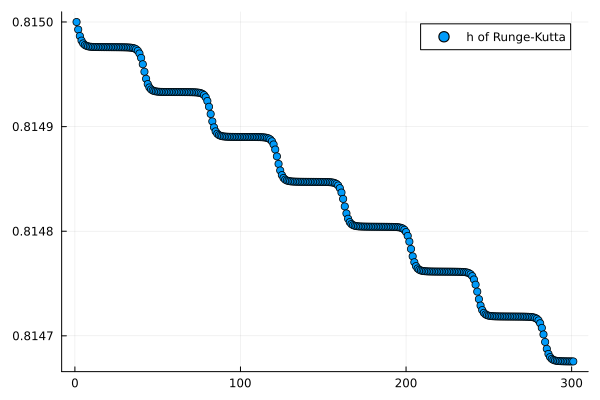

In [105]:
scatter(map(v -> v[3], h_R), label = "h of Runge-Kutta")

だいたい40回のプロットごとに鋭く下降している．

In [106]:
for i in 1:60
    println(h_R[i+1]-h_R[i],",i=",i)
end

[0.0, -0.0, -7.1989927507010165e-6],i=1
[0.0, 0.0, -6.210069238066218e-6],i=2
[0.0, 0.0, -4.3759216832306436e-6],i=3
[0.0, 0.0, -2.6786849403048762e-6],i=4
[0.0, 0.0, -1.520724493109249e-6],i=5
[0.0, 0.0, -8.431060416480562e-7],i=6
[0.0, 0.0, -4.7224473898044295e-7],i=7
[0.0, 0.0, -2.725255507929347e-7],i=8
[0.0, 0.0, -1.636532998006146e-7],i=9
[0.0, 0.0, -1.0269326022882552e-7],i=10
[0.0, 0.0, -6.740672453542373e-8],i=11
[0.0, 0.0, -4.625499827604074e-8],i=12
[0.0, 0.0, -3.314044061397681e-8],i=13
[0.0, 0.0, -2.4755434924195185e-8],i=14
[0.0, 0.0, -1.9252981875439446e-8],i=15
[0.0, 0.0, -1.557159345910719e-8],i=16
[0.0, 0.0, -1.308519026466115e-8],i=17
[0.0, 0.0, -1.1417152445680756e-8],i=18
[0.0, 0.0, -1.0339314626683915e-8],i=19
[0.0, 0.0, -9.716302873385985e-9],i=20
[0.0, 0.0, -9.475117690449508e-9],i=21
[0.0, 0.0, -9.589784855101868e-9],i=22
[0.0, 0.0, -1.0076257828117718e-8],i=23
[0.0, 0.0, -1.099605728693831e-8],i=24
[0.0, 0.0, -1.246984249192451e-8],i=25
[0.0, 0.0, -1.470531385

近似精度を上げたはずなのに無視できない差分が発生している．特に近日点を通過するあたりでは減少分が10^-6オーダーと通常時の約100倍である．

両者の計算方法によるhの変化の違いについて考察する．

第一に，Feynmanの方法ではhが保存するのは，Leap-frog法がシンプレクティック性を持つためであるようだ．
一方でRunge-Kutta法はシンプレクティック性を持たない．解析力学については未習なので，夏休みに触れてみようと思う．

第二に，Runge-Kutta法で近日点を通過する際にhが大きく減少するのは，
近日点付近では惑星の速さが大きくなることが原因だとは考えられるが，それ以上のことはわからない．

Δt=0.001, i=30000とした場合を下に載せたが，増加した箇所もあった．


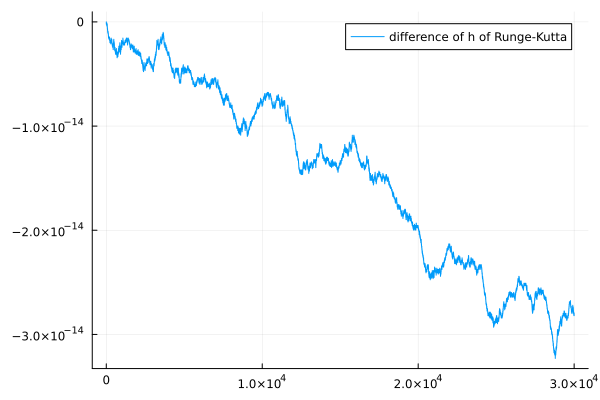

In [107]:
h_R01= [h_R0[1] for _ in 0:30000]
plot(map(v -> v[3], h_R0 - h_R01), label = "difference of h of Runge-Kutta") # Δt = 0.001, i = 30000のときのhのz成分をプロット

### 調和の法則

Tを周期，Lを長半径とする．調和の法則によると，今回はGM=1なので
$$
\frac{T^2}{L^3}=\frac{4\pi^2}{GM}=4\pi^2
$$
だった．Δt=0.1なので，n回のプロットで軌道を一周するとき
$$
T=n\Delta t=0.1n
$$
になる．上式に代入して
$$
n=10T=20\pi\sqrt{L^3}
$$
になる．右辺を計算する．


In [108]:
20*π*sqrt(L_F^3) #一周に要する回数を計算

42.214064740072644

In [109]:
20*π*sqrt(L_R^3)

40.347851172516016

惑星運動の周期を求めるために，y座標の符号変化を調べる．y座標が0以下から正に転じるとき，近日点を通過したといえる．

In [110]:
for i in 1:300                     # Feynman
    if y_F[i] <= 0 && y_F[i+1] > 0 # 近日点を通過したとき，その時のy座標を表示
        println("y_F[", i, "] = ", y_F[i], " から y_F[", i+1, "] = ", y_F[i+1]," の間に近日点を通過")
    end
end

y_F[1] = 0.0 から y_F[2] = 0.163 の間に近日点を通過
y_F[42] = -0.08590235333512256 から y_F[43] = 0.0786971749664585 の間に近日点を通過
y_F[84] = -0.007304544063867935 から y_F[85] = 0.1557349566300639 の間に近日点を通過
y_F[125] = -0.09297299095247571 から y_F[126] = 0.07111057348064012 の間に近日点を通過
y_F[167] = -0.014856779728629532 から y_F[168] = 0.1477241083411094 の間に近日点を通過
y_F[208] = -0.10015564313238653 から y_F[209] = 0.06289898053906964 の間に近日点を通過
y_F[250] = -0.022900633406902238 から y_F[251] = 0.13873079825279339 の間に近日点を通過
y_F[291] = -0.10769284258976763 から y_F[292] = 0.05382569100635515 の間に近日点を通過


In [111]:
for i in 1:300                     # Runge-Kutta
    if y_R[i] <= 0 && y_R[i+1] > 0 # 近日点を通過したとき，その時のy座標を表示
        println("y_R[", i, "] = ", y_R[i], " から y_R[", i+1, "] = ", y_R[i+1]," の間に近日点を通過")
    end
end

y_R[1] = 0.0 から y_R[2] = 0.1608469872799771 の間に近日点を通過
y_R[41] = -0.057847900978937716 から y_R[42] = 0.10445544592438408 の間に近日点を通過
y_R[81] = -0.1131309853671306 から y_R[82] = 0.0490456297943585 の間に近日点を通過
y_R[122] = -0.004799977881869838 から y_R[123] = 0.15620446625967324 の間に近日点を通過
y_R[162] = -0.056591898205404334 から y_R[163] = 0.10567267452117438 の間に近日点を通過
y_R[202] = -0.10594260803050923 から y_R[203] = 0.05631140794275638 の間に近日点を通過
y_R[242] = -0.15256751098451488 から y_R[243] = 0.008550394195253969 の間に近日点を通過
y_R[283] = -0.03725587842249817 から y_R[284] = 0.1246607949452663 の間に近日点を通過


それぞれだいたい42回，40回のプロットで一周していることから，近似的に調和の法則が成り立っていると言える．